## Reading the data 

In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
bk=pd.read_csv('bank_note_data.csv')

In [5]:
bk.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bk.columns=['Image_Var','Image_Skew','Image_Curt','Entropy','Class']

In [7]:
bk.head()

,Image_Var,Image_Skew,Image_Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


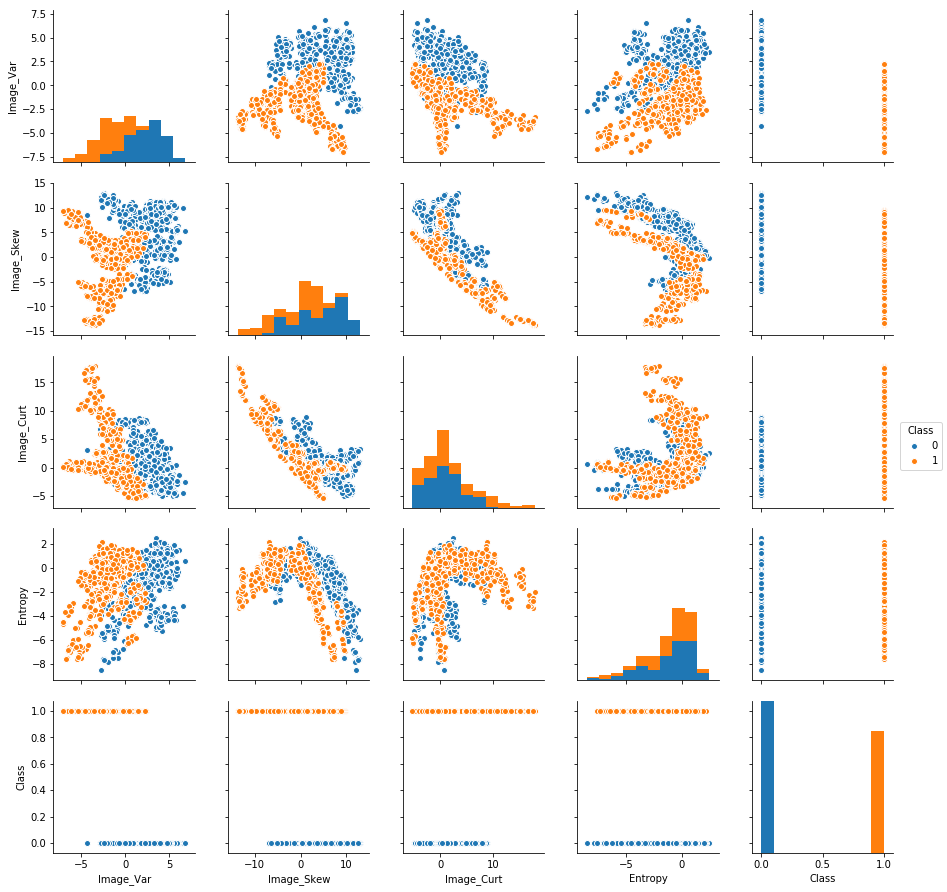

In [13]:
sns.pairplot(data=bk,hue='Class')

## Train Test Split

In [6]:
X=bk.drop('Class',axis=1)
y=bk['Class']

In [7]:
X.head()

,Image_Var,Image_Skew,Image_Curt,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf=RandomForestClassifier()

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_pred=rf.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [24]:
confusion_matrix(y_test,y_pred)

array([[233,   5],
       [  3, 171]], dtype=int64)

In [25]:
accuracy_score(y_test,y_pred)

0.9805825242718447

## ESTIMATOR 

In [26]:
import tensorflow as tf

C:\Users\Lincon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
X.columns

Index(['Image_Var', 'Image_Skew', 'Image_Curt', 'Entropy'], dtype='object')

In [28]:
feat_cols=[]

for cols in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(cols))



In [29]:
feat_cols

[_NumericColumn(key='Image_Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image_Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image_Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [30]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True)

In [31]:
cla=tf.estimator.DNNClassifier(hidden_units=[10,20,10],n_classes=2,feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Lincon\\AppData\\Local\\Temp\\tmpup8qxrl9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000017CF7E635C0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
cla.train(input_fn=input_func,steps=500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lincon\AppData\Local\Temp\tmpup8qxrl9\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\Lincon\AppData\Local\Temp\tmpup8qxrl9\model.ckpt.
INFO:tensorflow:loss = 0.56309146, step = 51
INFO:tensorflow:global_step/sec: 230.587
INFO:tensorflow:loss = 0.0089399805, step = 151 (0.439 sec)
INFO:tensorflow:global_step/sec: 252.67
INFO:tensorflow:loss = 0.019767983, step = 251 (0.395 sec)
INFO:tensorflow:global_step/sec: 408.372
INFO:tensorflow:loss = 0.00057986635, step = 351 (0.247 sec)
INFO:tensorflow:global_step/sec: 405.114
INFO:tensorflow:loss = 0.028007044, step = 451 (0.247 sec)
INFO:tensorflow:Saving checkpoints for 530 into C:\Users\Lincon\AppData\Local\Temp\tmpup8qxrl9\model.ckpt.


In [34]:
pred_fn=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)

In [35]:
note_pred=list(cla.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Lincon\AppData\Local\Temp\tmpup8qxrl9\model.ckpt-530
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [36]:
note_pred[0]

{'logits': array([-20.642855], dtype=float32),
 'logistic': array([1.0837325e-09], dtype=float32),
 'probabilities': array([1.0000000e+00, 1.0837325e-09], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

In [37]:
final_pred=[]

for pred in note_pred:
    final_pred.append(pred['class_ids'][0])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [39]:
print(confusion_matrix(y_test,final_pred))

[[238   0]
 [  0 174]]


In [40]:
accuracy_score(y_test,final_pred)*100

100.0